# ДЗ 4 неделя

## Импорт библиотек

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Первое задание

Вам поручено провести исследование по вопросу вывода нового продукта на рынок. В ходе исследования были опрошены 1200 человек (число_опрошенных = 1200). 25% из них заинтересовались новым продуктом (доля_ответов(р) = 0.25).

Рассчитайте показатель ошибки выборочного расчёта (или по другому - предельная ошибка “Н”) при условии доверительного уровня Z, равного 95%. И выведите ответ в формате интервала p - Н и p + Н. Ответ дайте в процентах и с округлением до второго знака.

Данные с результатами исследования находятся в файле data.csv с полями:
 - в первом столбце – число_опрошенных
 - во втором столбце – доля_ответов
 - в третьем столбце – доверительный_уровень

Разделитель столбцов – точка с запятой, десятичный разделитель – запятая.

In [27]:
def get_error(amount: int, fraction: float, trust: float):
    avg_err = trust * np.sqrt(fraction * (1 - fraction) / amount)
    return avg_err


n = 1200
p = 0.25
z = 1.96
h = get_error(n, p, z)
print(round((p - h) * 100, 2), round((p + h) * 100, 2))

22.55 27.45


### Решение в lms

```python
df = pd.read_csv("data.csv", skipinitialspace=True, decimal=",", sep=";")
n = df.iloc[0]['число_опрошенных']
p = df.iloc[0]['доля_ответов']
z = df.iloc[0]['доверительный_уровень']
```

## Второе задание

На стоянке магазина подержанных автомобилей стоит 1200 машин. Провели осмотр 200 машин и зафиксировали пробег (в тыс км).
Требуется рассчитать интервал истинной генеральной доли автомобилей с пробегом более 140. при условии доверительного уровня Z, равного 95%.
Расчёт произвести в процентах и с округлением до второго знака. Вывести на экран в виде p - Н и p + Н

Данные с результатами исследования находятся в файле data.csv с одним полем: пробег
Разделитель столбцов – точка с запятой, десятичный разделитель – запятая.

In [28]:
df = pd.read_csv("avto_2.csv", encoding="cp1251", skipinitialspace=True, decimal=",", sep=";")

n = df.shape[0]
p = df[df["пробег"] > 140].shape[0] / n
z = 1.96

h = get_error(n, p, z)
print(round((p - h) * 100, 2), round((p + h) * 100, 2))

49.5 64.79


## Третье задание

Производитель контролирует вес шоколадки Полёт. Вес в среднем должен быть 70 грамм. Какую выборку нужно отобрать, чтобы с доверительным уровнем Z, равным 95%, обеспечить предельную погрешность среднего Н 1 грамм. Данные об измерениях веса вес_шоколадки представлены в файле.

На этапе анализа данных выяснилось, что есть "супервыбросы" в данных. Перед проведением расчёта от них необходимо избавиться.
Окончательный результат вывести в виде числа, округлённого до целого.
Данные с результатами исследования разных шоколадок находятся в файле data.csv с полями:
в первом столбце – вес_шоколадки
во втором столбце – название
Разделитель столбцов – точка с запятой, десятичный разделитель – запятая

In [29]:
df = pd.read_csv("chocol_3.csv", encoding="cp1251", skipinitialspace=True, decimal=",", sep=";").dropna()
df = df[df['название'] == 'полёт']['вес_шоколадки']
df = df[(df > df.quantile(0.01)) & (df < df.quantile(0.99))]
o = df.std() ** 2  # дисперсия
z = 1.96
h = 1
print(round((z * o / h) ** 2))

1694


## Четвёртое задание

Необходимо рассчитать объем выборки для проведения опроса населения по вопросу повышения пенсионного возраста, в зависимости от предельной ошибки Н. Соотношение за/против населения по данному вопросу - не известно. Доверительный уровень Z принимаем 95%. H изменяется от 0.01 до 0.1 с шагом 0.01.

Результат вывести в виде таблицы DataFrame из двух столбцов.
Название первого столбца: допустимая_ошибка: выводим предельную ошибку Н в процентах и в целочисленном виде.
Название второго столбца размер_выборки: выводим значение посчитанного объёма выборки n в целочисленном виде.

In [30]:
def get_fraction(err, p=0.5, trust=1.96):
    return (trust * np.sqrt(p * (1 - p)) / err) ** 2


new_df = {
    'допустимая_ошибка': [], 
    'размер_выборки': []
}   
for i in range(1, 10):
    new_df['допустимая_ошибка'].append(i)
    new_df['размер_выборки'].append(int(get_fraction(i) * 10000))
    
new_df = pd.DataFrame.from_dict(new_df)
print(new_df)


   допустимая_ошибка  размер_выборки
0                  1            9604
1                  2            2401
2                  3            1067
3                  4             600
4                  5             384
5                  6             266
6                  7             195
7                  8             150
8                  9             118


## Пятое задание

За смену выпускается 8000 шоколадок. Необходимо:

1) определить предельную ошибку Н для шоколадок с весом более или равным 100 грамм. Результат округлить до третьего знака

2) Рассчитать, сколько нужно проконтролировать шоколадок, чтобы улучшить оценку допустимой ошибки (посчитанную в п.1) в 5 раз (новую ошибку также округлить до третьего знака). А размер выборки округлить до целого.

Доверительный уровень Z принимаем 95%. Вывод представить в виде пары чисел через запятую: результат пункта 1, результат пункта 2

Данные с результатами исследования находятся в файле data.csv с одним полем вес_шоколадки, десятичный разделитель – запятая.

In [31]:
df = pd.read_csv("cake_5.csv", encoding="cp1251", skipinitialspace=True, decimal=",", sep=";").dropna()
df_filter = df[df['вес_шоколадки'] >= 100].reset_index(drop=True)

n = df_filter.shape[0]  # кол-во шоколадок, которые можно отобрать
p = n / df.shape[0]  # доля таких шоколадок

z = 1.96
N = 8000

selection = (n * N) / (n + N - 1)  # выборка
h = round(z * (p * (1 - p) / selection) ** 0.5, 3)  # ответ на 1 пункт
h2 = round(h / 5, 3)
fraction = (z ** 2 * p * (1 - p)) / (h ** 2 * N)
result = (fraction * (N - 1)) / (1 - fraction)
print(f"{h} , {round(result)}")

0.109 , 81


## Шестое задание

В файле data.csv, доступном вашему решению, находится информация с полями (разделитель – запятая):

Покупательская активность, Выручка_от_клиента_текущий_месяц

Пример таблицы с данными:
result

Необходимо:
1) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр;
- пробелы между словами заменить на _;
- язык сохранить - кириллица.

2) Построить графики гистограммы и ящика с усами на одной картинке. При построении учесть:
построить изображение с графиками по категории из фактора "покупательская активность". Название категории вводится.
использовать библиотеку seaborn;
для построения гистограммы использовать histplot() с параметром количества столбцов 30;
на гистограмме вывести также график оценки плотности;
вывести заголовок диаграммы:
Гистограмма и ящик с усами для количественных данных
оси графиков не подписывать; те, что по умолчанию - исключить;
остальные настройки графика по цвету, шрифту, отступам - оставить по умолчанию;
размер изображения задать 9х3 дюймов;
Важно учесть: после отбора группы для построения графиков необходимо сбросить индексы.
Сохраните диаграмму в файл target_4_6.png.

In [32]:
df = pd.read_csv("6.csv", encoding="cp1251")

for i in range(0, df.shape[0] - 1, 3):  # настройка для удобства
    df.loc[i, "Покупательская активность"] = "Прежний уровень"
    
df.columns = df.columns.str.replace(" ", "_")  # замена пробелов
df.columns = df.columns.str.lower()  # нижний регистр
df = df[["покупательская_активность", "выручка_от_клиента_текущий_месяц"]]
df

,покупательская_активность,выручка_от_клиента_текущий_месяц
0,Прежний уровень,4707
1,Снизилась,4751
2,Снизилась,4607
3,Прежний уровень,4182
4,Снизилась,4484
...,...,...
300,Прежний уровень,4978
301,Снизилась,4986
302,Снизилась,4530
303,Прежний уровень,4595


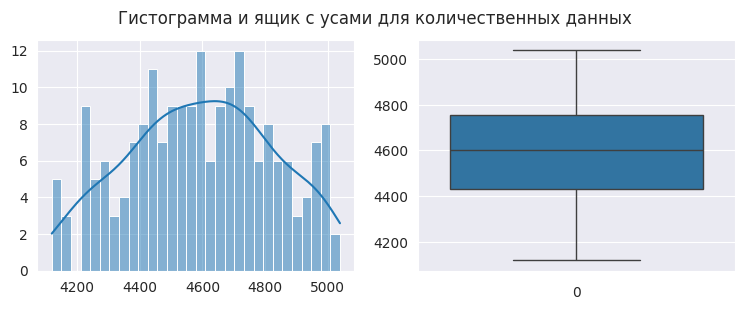

In [33]:
val = "Снизилась"
df = df[df["покупательская_активность"] == val].reset_index(drop=True)
# Создание объектов осей и подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# Гистограмма с оценкой плотности
sns.histplot(data=df, bins=30, kde=True, legend=False, ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)

# Ящик с усами
sns.boxplot(data=df, y="выручка_от_клиента_текущий_месяц", ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(0)

# Общий заголовок
plt.suptitle("Гистограмма и ящик с усами для количественных данных")

# Отображение графика
plt.savefig("target_4_6.png")
